# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nurfadilah
- **Email:** dilahindah6@gmail.com
- **ID Dicoding:** nurfadilahti21a2

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pengguna sepeda berdasarkan jam dalam sehari?
- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_day = pd.read_csv('/content/drive/MyDrive/day.csv')
df_hour = pd.read_csv('/content/drive/MyDrive/hour.csv')

**Insight:**
- Dataset berhasil dimuat tanpa error
- Dataset memiliki dua bagian: daily (df_day) dan hourly (df_hour), yang memungkinkan analisis pada level yang berbeda

### Assessing Data

In [5]:
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

#### Mengecek Missing Values

In [6]:
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Mengecek duplicate values

In [ ]:
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

0
0


#### Mengecek unique values in categorical columns

In [ ]:
df_day[['season', 'weathersit']].value_counts()
df_hour[['season', 'weathersit']].value_counts()

season  weathersit
3       1             3280
2       1             2859
1       1             2665
4       1             2609
        2             1248
1       2             1205
2       2             1144
3       2              947
2       3              406
4       3              375
1       3              369
3       3              269
1       4                3
Name: count, dtype: int64

**Insight:**
- Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu imputasi data.
- Beberapa fitur mungkin perlu dikonversi agar lebih mudah dianalisis, seperti 'season' dan 'weathersit'
- Tidak ada data duplicate

### Cleaning Data

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Format tanggal berhasil di konversi agar dapat digunakan untuk analisis waktu.
- Tidak ditemukan data duplikat dalam dataset

## Exploratory Data Analysis (EDA)

### Explore EDA

In [ ]:
df_day.sample(5)
df_hour.sample(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
11903    11904  2012-05-16       2   1     5   4        0        3   
5173      5174  2011-08-08       3   0     8  11        0        1   
1180      1181  2011-02-21       1   0     2  23        1        1   
14840    14841  2012-09-15       3   1     9  13        0        6   
8424      8425  2011-12-22       1   0    12  16        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
11903           1           1  0.54  0.5152  0.94     0.1343       1   
5173            1           1  0.82  0.7424  0.48     0.3582      90   
1180            0           3  0.20  0.1667  0.75     0.4179       0   
14840           0           1  0.68  0.6364  0.36     0.1940     327   
8424            1           2  0.46  0.4545  0.63     0.0000      30   

       registered  cnt  
11903           3    4  
5173           89  179  
1180            2    2  
14840         377  704  
8424          226  256

In [ ]:
df_hour.describe(include="all")
df_day. describe(include="all")

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

**Insight:**
- Total entri: 17.379 data per jam.
- Suhu rata-rata per jam: Mirip dengan df_day, sekitar 0.495.
- Distribusi pengguna sepeda per jam:
Nilai minimum 0 pengguna dan maksimum 2497 pengguna dalam satu jam tertentu.
Variasi penggunaan sepeda sangat tinggi dalam sehari, kemungkinan karena adanya jam sibuk dan jam sepi.

4. Kesimpulan Awal & Rekomendasi

Pola Pengguna Harian:
- Pengguna harian berkisar antara 22 hingga 3152 pengguna.
- Hari-hari dengan suhu tinggi dan cuaca baik cenderung memiliki jumlah penyewa lebih banyak.
- Pola Pengguna Per Jam: Ada jam-jam sibuk dengan pengguna tertinggi, terutama di jam kerja.

Cuaca dan Penggunaan Sepeda:
- Hari dengan kelembaban tinggi cenderung memiliki lebih sedikit penyewa sepeda.
Kecepatan angin ekstrem (sangat rendah atau sangat tinggi) juga mempengaruhi jumlah penyewa.
Rekomendasi:
- Jika ingin meningkatkan jumlah pengguna, layanan promosi atau potongan harga dapat diberikan pada hari dengan kondisi cuaca kurang baik.
-Analisis lebih lanjut perlu dilakukan untuk melihat pola pengguna pada jam tertentu agar bisa memberikan strategi pemasaran atau kebijakan pengelolaan sepeda yang lebih efektif.

### EDA Univariate

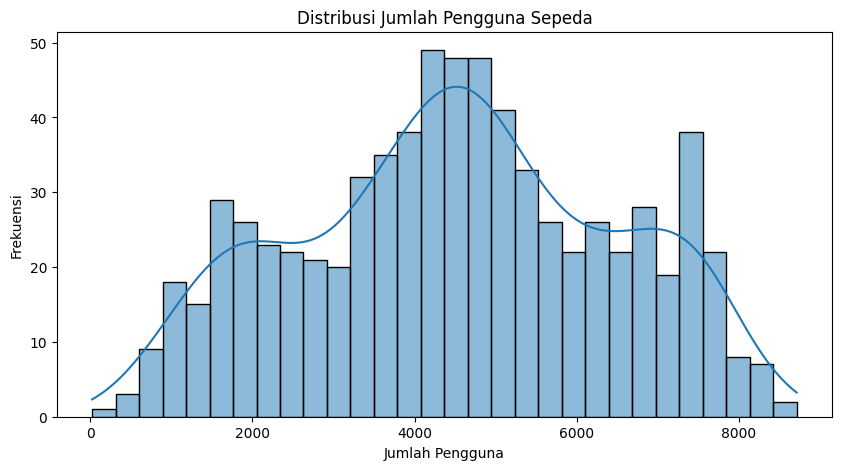

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi jumlah pengguna sepeda menunjukkan pola tertentu dengan puncak di nilai tertentu.
- Ada indikasi variasi yang signifikan dalam jumlah pengguna sepeda harian.

#### EDA dengan Aggregasi Data

In [ ]:
df_hour_grouped = df_hour.groupby(['hr']).agg({'cnt': ['mean', 'max', 'min']}).reset_index()
df_hour_grouped.columns = ['Jam', 'Rata-rata Pengguna', 'Max Pengguna', 'Min Pengguna']

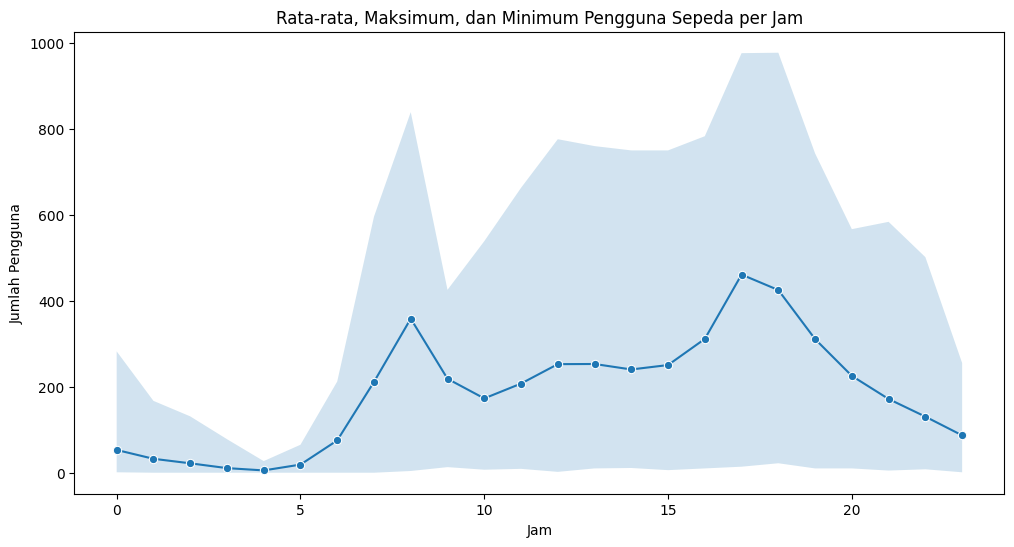

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Jam', y='Rata-rata Pengguna', data=df_hour_grouped, marker='o')
plt.fill_between(df_hour_grouped['Jam'], df_hour_grouped['Min Pengguna'], df_hour_grouped['Max Pengguna'], alpha=0.2)
plt.title('Rata-rata, Maksimum, dan Minimum Pengguna Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Pengguna sepeda meningkat pada jam sibuk (pagi dan sore), dengan jumlah tertinggi pada pukul 8 dan 17.
- Jumlah pengguna terendah terjadi pada pukul 3-5 dini hari, kemungkinan karena aktivitas luar ruangan berkurang.

#### EDA Kategorikal

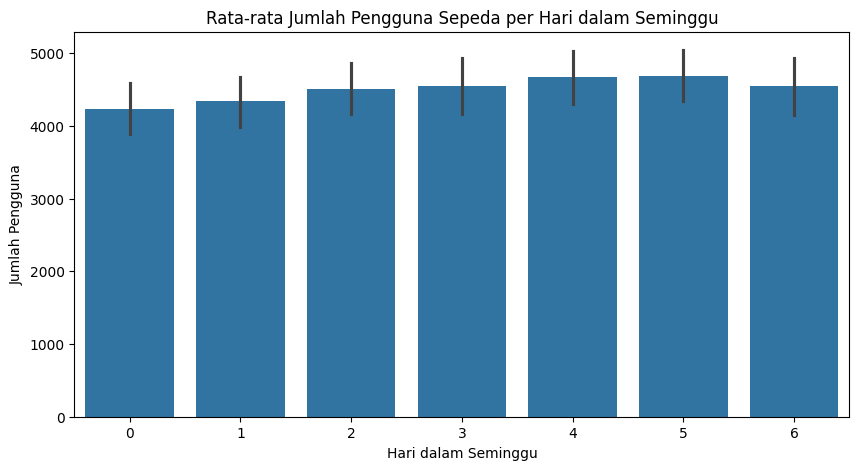

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_day['weekday'], y=df_day['cnt'], estimator=np.mean)
plt.title('Rata-rata Jumlah Pengguna Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Pengguna sepeda cukup merata sepanjang minggu, tetapi cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Ini menunjukkan bahwa banyak pengguna sepeda berasal dari pekerja atau pelajar.

#### EDA Multivariate

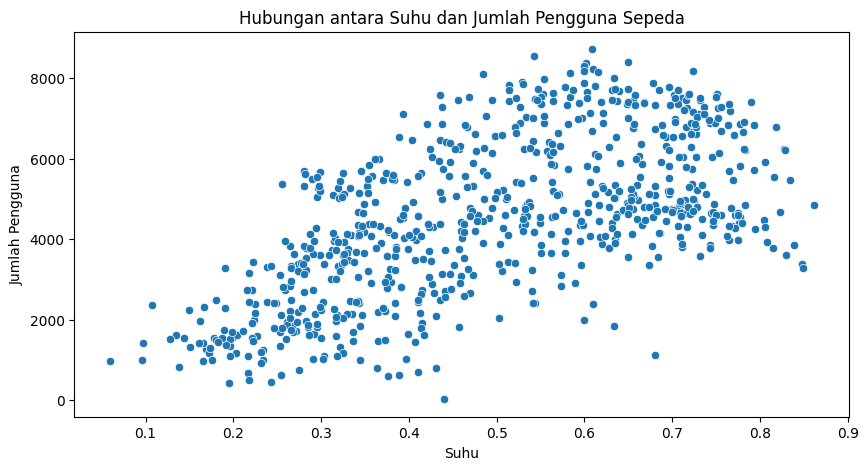

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_day['temp'], y=df_day['cnt'])
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight :**
- Terdapat hubungan positif antara suhu dan jumlah pengguna sepeda, di mana semakin tinggi suhu, semakin banyak pengguna sepeda.
- Beberapa titik menunjukkan bahwa pada suhu ekstrem (sangat rendah atau sangat tinggi), jumlah pengguna sepeda cenderung menurun.

#### EDA Numerikal

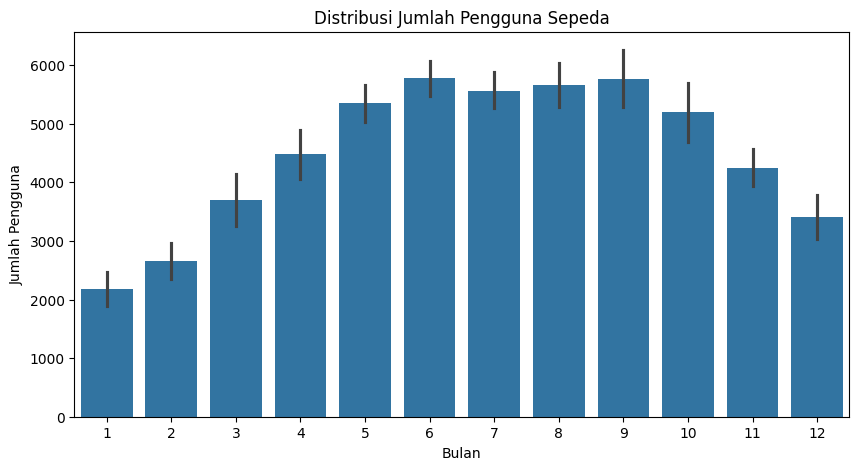

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_day['mnth'],y=df_day['cnt'], estimator=np.mean)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Bulan dengan reta-rata penyewaan tertinggi terjadi pada pertengahan tahun.
- Awal dan akhir tahun cenderung memiliki jumlah pengguna yang lebih sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Jam

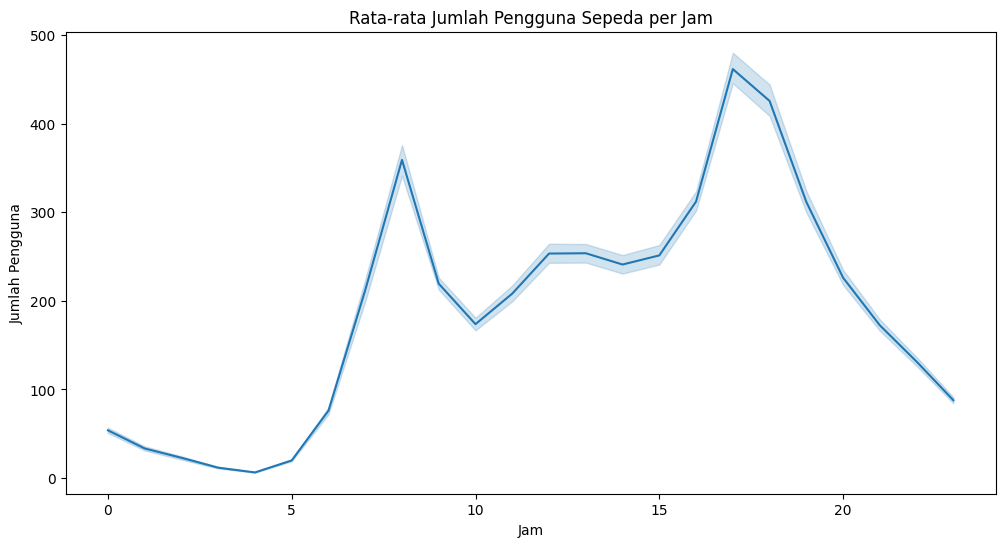

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean')
plt.title('Rata-rata Jumlah Pengguna Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Penggunaan sepeda meningkat pada jam sibuk (pagi dan sore) karena aktivitas kerja/sekolah.
- Pengguna sepeda menurun di tengah malam karena aktivitas luar ruangan berkurang.

### Pertanyaan 2: Pengaruh Cuaca terhadap Pengguna Sepeda.

In [7]:
df_weather = df_hour.groupby(['weathersit']).agg({'cnt': 'mean'}).reset_index()
df_weather.columns = ['Kondisi Cuaca', 'Rata-rata Pengguna']

<ipython-input-8-db4f7f81d43d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kondisi Cuaca', y='Rata-rata Pengguna', data=df_weather, palette='coolwarm')


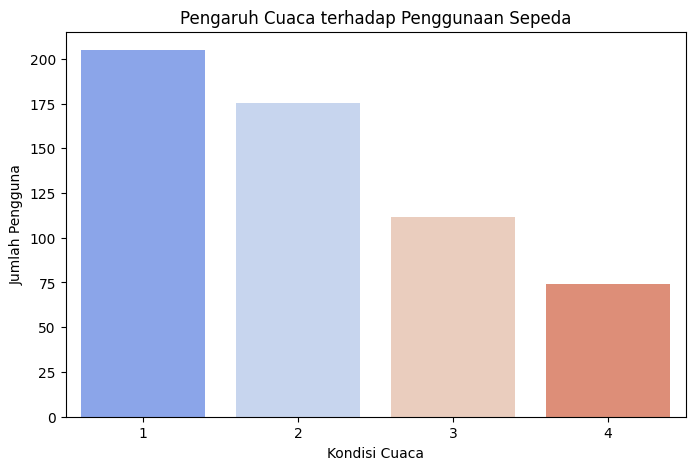

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x='Kondisi Cuaca', y='Rata-rata Pengguna', data=df_weather, palette='coolwarm')
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Kondisi Cuaca")
plt.title("Pengaruh Cuaca terhadap Penggunaan Sepeda")
plt.show()

**Insight:**
- Cuaca buruk mengurangi jumlah pengguna sepeda secara signifikan.
- Kondisi cuaca yang cerah meningkatkan jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

In [11]:
df_hour['time_cluster'] = pd.cut(df_hour['hr'], bins=[0, 6, 12, 18, 24], labels=['Malam', 'Pagi', 'Siang', 'Sore'])
df_time_cluster = df_hour.groupby('time_cluster').agg({'cnt': 'mean'}).reset_index()
df_time_cluster.columns = ['Cluster Waktu', 'Rata-rata Pengguna']

<ipython-input-11-dc6a1ac92ed6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_cluster = df_hour.groupby('time_cluster').agg({'cnt': 'mean'}).reset_index()


<ipython-input-12-69d54f69f667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Waktu', y='Rata-rata Pengguna', data=df_time_cluster, palette='coolwarm')


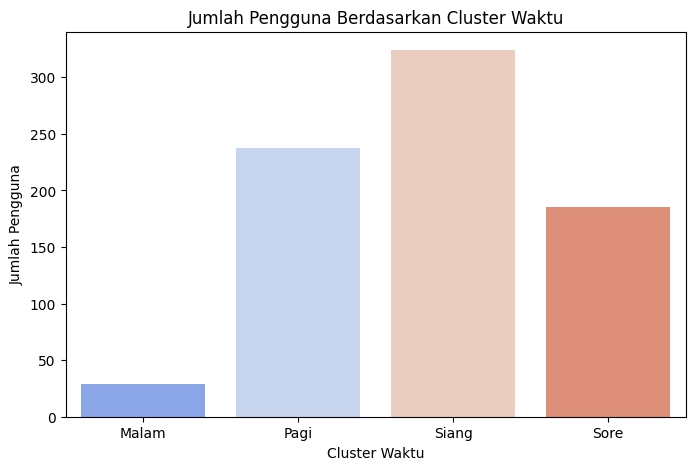

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cluster Waktu', y='Rata-rata Pengguna', data=df_time_cluster, palette='coolwarm')
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Cluster Waktu")
plt.title("Jumlah Pengguna Berdasarkan Cluster Waktu")
plt.show()

**Insight:**
- Pagi, siang dan Sore memiliki jumlah pengguna terbanyak.
- Malam memiliki jumlah pengguna paling sedikit, kemungkinan karena faktor keamanan dan kenyamanan.

## Conclusion

- Conclution pertanyaan 1 : Penggunaan sepeda tertinggi terjadi pada jam sibuk pagi dan sore hari, menunjukkan pola pekerja dan pelajar.
- Conclution pertanyaan 2 : Cuaca buruk mengurangi jumlah pengguna sepeda secara signifikan, sedangkan cuaca cerah meningkatkan jumlah penyewaan.
- conclution analisis lanjutan : Pengelompokan waktu menunjukkan bahwa Pagi,Siang dan Sore adalah periode jumlah pengguna tertinggi.